In [1]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [2]:
N = 200

x_start, x_end = -4.0, 4.0
y_start, y_end = -2.0, 2.0
x = numpy.linspace(x_start, x_end, N)
y = numpy.linspace(y_start, y_end, N)
X, Y = numpy.meshgrid(x, y)

In [3]:
numpy.shape(X)

(200, 200)

In [4]:
u_inf = 1.0

u_freestream = u_inf * numpy.ones((N, N), dtype=float)

v_freestream = numpy.zeros((N, N), dtype=float)

psi_freestream = u_inf * Y

In [5]:
u_inf = 1.0

u_freestream = u_inf * numpy.ones((N, N), dtype=float)

v_freestream = numpy.zeros((N, N), dtype=float)

psi_freestream = u_inf * Y

In [11]:
def get_velocity(strength, xs, ys, X, Y):
    """
    Returns the velocity field generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = strength/(2*numpy.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*numpy.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    
    return u, v

In [9]:
help(get_velocity)

Help on function get_velocity in module __main__:

get_velocity(strength, xs, ys, X, Y)
    Returns the velocity field generated by a source/sink
    
    Parameters
    ----------
    strength: float
        strength of the source/sink
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y_coordinate of the source (or sink).
    X: 2D Numpy array of the floats
        x_coordinate of the mesh points.
    Y: 2D Numpy array of the floats
        y-coordinate of the mesh points.
        
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.



In [12]:
def get_stream_function(strength, xs, ys, X, Y):
    """
    Returns the stream-function generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength/(2*numpy.pi)*numpy.arctan2((Y-ys), (X-xs))
    
    return psi

In [13]:
strength_source = 5.0            

x_source, y_source = -1.0, 0.0   

u_source, v_source = get_velocity(strength_source, x_source, y_source, X, Y)

psi_source = get_stream_function(strength_source, x_source, y_source, X, Y)

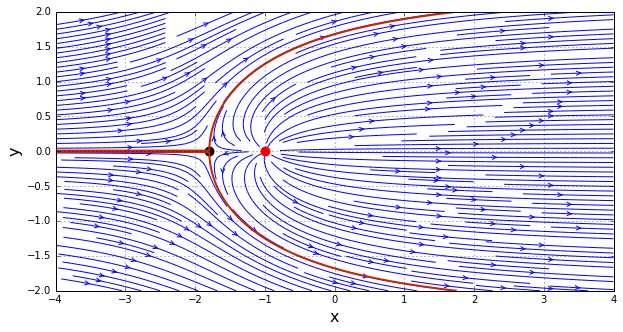

In [17]:
u = u_freestream + u_source

v = v_freestream + v_source

psi = psi_freestream + psi_source

size = 10

pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))

pyplot.grid(True)

pyplot.xlabel('x', fontsize=16)

pyplot.ylabel('y', fontsize=16)

pyplot.xlim(x_start, x_end)

pyplot.ylim(y_start, y_end)

pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')

pyplot.scatter(x_source, y_source, color='r', s=80, marker='o')

x_stagnation = x_source - strength_source/(2*numpy.pi*u_inf)

y_stagnation = y_source

pyplot.scatter(x_stagnation, y_stagnation, color='k', s=80, marker='o')

pyplot.contour(X, Y, psi, 
            levels=[-strength_source/2, +strength_source/2], 
            colors='#CD2305', linewidths=2, linestyles='solid')

In [18]:
strength_sink = -5.0

x_sink, y_sink = 1.0, 0.0

u_sink, v_sink = get_velocity(strength_sink, x_sink, y_sink, X, Y)

psi_sink = get_stream_function(strength_sink, x_sink, y_sink, X, Y)

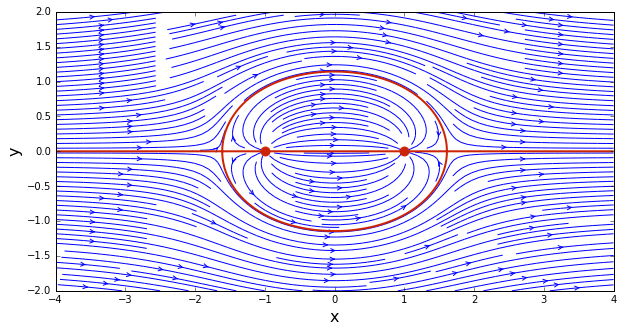

In [20]:
u = u_freestream + u_source + u_sink

v = v_freestream + v_source + v_sink

psi = psi_freestream + psi_source + psi_sink

size = 10

pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))

pyplot.xlabel('x', fontsize=16)

pyplot.ylabel('y', fontsize=16)

pyplot.xlim(x_start, x_end)

pyplot.ylim(y_start, y_end)

pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')

pyplot.scatter([x_source, x_sink], [y_source, y_sink], color='#CD2305', s=80, marker='o')

pyplot.contour(X, Y, psi, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')